# Condensation_droplet_detection

This notebook use the `imfindcircles` function (developed by me) to find condensation droplets in images. 

## 0 Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
import os
import matplotlib
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.size'] = 2  # Length of major ticks
plt.rcParams['ytick.major.size'] = 2  # Length of major ticks
plt.rcParams['xtick.minor.size'] = 1  # Length of minor ticks
plt.rcParams['ytick.minor.size'] = 1  # Length of minor ticks
import sys
sys.path.insert(0, "C:/Users/zl948/Documents/GitHub/mylib/src")
from myimagelib import readdata, imfindcircles

## 1 Find droplets

### 1.1 Preprocessing

In [ ]:
folder = r"G:\My Drive\Research projects\F\Data\02202025\exp2"
imgName = "Img73245"

In [45]:
# read image
img = io.imread(os.path.join(folder, imgName+".jpg"))
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray)

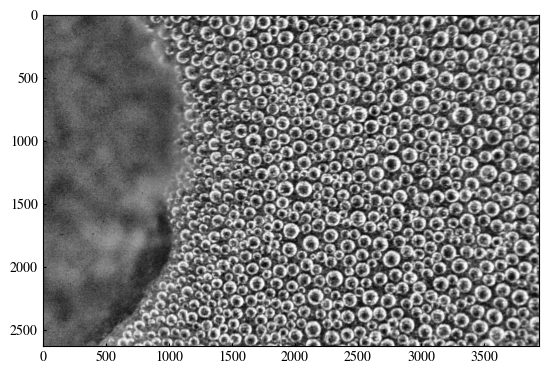

In [46]:
plt.imshow(enhanced_gray, cmap='gray')

### 1.2 Use `imfindcircles`

In [47]:
circles = imfindcircles(enhanced_gray, (40, 55), nIter=1)

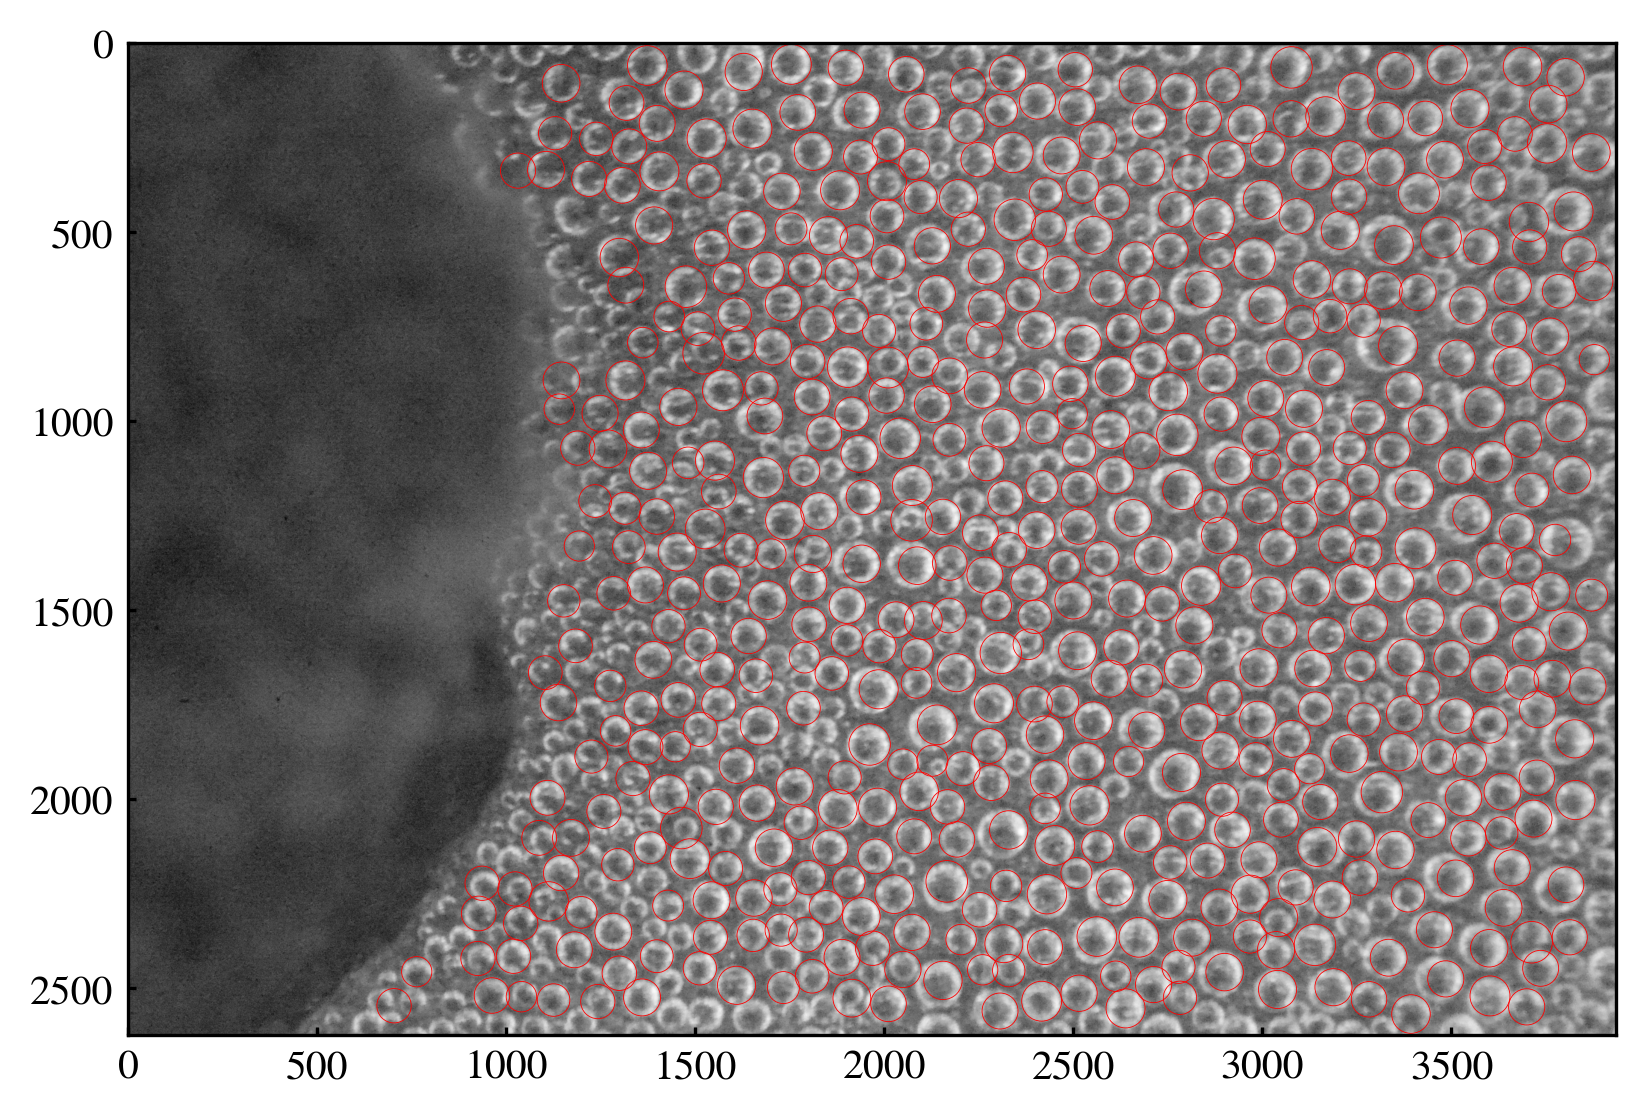

In [48]:
fig, ax = plt.subplots(dpi=300)
ax.imshow(gray, cmap='gray')
for num, i in circles.iterrows():
    circle = plt.Circle((i.x, i.y), i.r, color='r', fill=False, linewidth=.2)
    ax.add_patch(circle)

In [49]:
circles.to_csv(os.path.join(folder, imgName+".csv"), index=False)